# Ant sorting

### General rules
No two objects can exist on the same cell

No two ants can exist on the same cell (not yet the case)

In [124]:
import numpy as np
import random

In [153]:
class Ant:
    """Agent that moves object on the grid"""
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.laden = False

    def pickup(self, object):
        self.object = object
        self.laden = True
        
    def drop(self, object):
        self.object = []
        self.laden = False
        
    def move(self):
        neighbours = von_neumann_neighbourhood(self.x, self.y)
        self.x, self.y = neighbours[random.randint(0, len(neighbours) - 1)]
        

In [126]:
def von_neumann_neighbourhood(x, y):
    """return coordinates of all cells in the Von Neumann neighbourhood of the input cell"""
    
    neighbours = []
    if x - 1 >= 0:
        neighbours.append((x - 1, y))
    if x + 1 < grid_size:
        neighbours.append((x + 1, y))
    if y - 1 >= 0:
        neighbours.append((x, y - 1))
    if y + 1 < grid_size:
        neighbours.append((x, y + 1))
        
    return neighbours

In [127]:
def dissimilarity(object_o, object_n):
    """calculate dissimilarity between objects"""
    
    return object_o - object_n

In [128]:
def local_density(x_o, y_o):
    """calculate local density"""
    
    neighbourhood = von_neumann_neighbourhood(x, y)
    s2 = len(neighbourhood) + 1
    similarity = 0
    
    for x_n, y_n in neighbourhood:
        similarity += 1 - dissimilarity(grid[x, y], grid[x_n, y_n])/alpha
        
    return max(0, 1/s2*similarity)

In [129]:
def pickup_probability(local_density):
    """calculate pickup probability"""
    
    return (k1/(k1 + local_density))**2

In [130]:
def drop_probability(local_density):
    """calculate drop probability"""
    
    if local_density < k2:
        probability = 2*local_density
    else:
        probability = 1
        
    return probability

## Parameters

In [145]:
grid_size = 10
t_total = 1000
k1 = 1
k2 = 10
alpha = 1
ants = [Ant(1, 1), Ant(2, 2), Ant(3, 3)]

In [144]:
grid = np.zeros((grid_size, grid_size))
for i in range(10):
    x = random.randint(0, grid_size - 1)
    y = random.randint(0, grid_size - 1)
    grid[x, y] = 1

## Simulation

In [146]:
grids = []

for t in range(1, t_total):
    
    for ant in ants:
        
        if (ant.laden == False) & (grid[ant.x, ant.y] != 0):
            p_pickup = pickup_probability(local_density(ant.x, ant.y))
            
            if random.random() <= p_pickup:
                ant.pickup(grid[ant.x, ant.y])
                grid[ant.x, ant.y] = 0
                
        elif (ant.laden == True) & (grid[ant.x, ant.y] == 0):
            p_drop = drop_probability(local_density(ant.x, ant.y))
            
            if random.random() <= p_drop:
                grid[ant.x, ant.y] = ant.object
                ant.drop(grid[ant.x, ant.y])
        
        ant.move()
        grids.append(np.copy(grid))

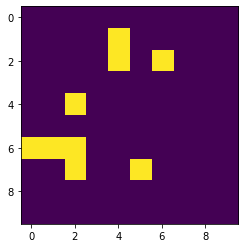

In [149]:
import matplotlib.pyplot as plt
plt.imshow(grids[0])

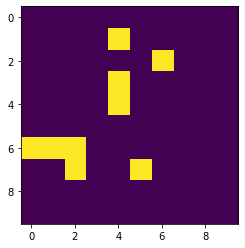

In [150]:
plt.imshow(grids[90])